# Project Problem Statement:

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

1.Check eligibility of the Customer given the inputs described above.
2.Identify customer segments from given data and categorize customer into one of the segments.
3.If customer is not eligible for the input required amount and duration:

3.1 What can be amount for the given duration.
3.2 If duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Fetch Training and testing set

In [2]:
import pandas as mt
trd = mt.read_csv("C:/Users/SHREE/Desktop/Data/training_set.csv")
tsd = mt.read_csv("C:/Users/SHREE/Desktop/Data/testing_set.csv")

In [3]:
trd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
trd.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [5]:
trd.Credit_History = trd.Credit_History.fillna(1)
w = []
for i in trd.Credit_History:
    w.append(int(i))
    
trd.Credit_History=w

# Find and replace missing data

In [6]:
trd.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
tsd.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
from important_tool import replacer
replacer(trd)
replacer(tsd)

In [9]:
#trd.isna().sum()

In [10]:
#tsd.isna().sum()

# Data Profile

In [11]:
trd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1,Urban,Y


# Drop unnecessary columns and declare X,Y

In [14]:
X = trd.drop(labels=["Loan_ID","Loan_Status"],axis=1)
Y = trd[["Loan_Status"]]

# Exploratory Data Analysis

 cat vs con --> boxplot, ANOVA

cat vs cat --> countplot with hue | crosstab

In [15]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)

In [16]:
cat=[]
con=[]
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [17]:
con.remove("Credit_History")
cat.append("Credit_History")

In [18]:
anova_res = []
for i in con:
    anova_res.append(ANOVA(trd,"Loan_Status",i))

In [19]:
list(zip(con,anova_res))

[('ApplicantIncome', 0.903),
 ('CoapplicantIncome', 0.142),
 ('LoanAmount', 0.368),
 ('Loan_Amount_Term', 0.604)]

# Preprocessing

In [20]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1,Urban
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1,Rural
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1,Urban
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1,Urban
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1,Urban


In [21]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5405.540850,1620.888940,146.412162,342.000000,0.855049
std,6108.923986,2926.235009,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Continous data

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
XS1 = mt.DataFrame(ss.fit_transform(X[con]),columns=con)

In [24]:
XS1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072651,-0.554368,0.000000,0.279851
1,0.000000,-0.038610,-0.219273,0.279851
2,-0.394096,-0.554368,-0.957641,0.279851
3,-0.462412,0.252103,-0.314547,0.279851
4,0.097389,-0.554368,-0.064454,0.279851
...,...,...,...,...
609,-0.410479,-0.554368,-0.898095,0.279851
610,-0.212902,-0.554368,-1.267279,-2.518655
611,0.436842,-0.472284,1.269371,0.279851
612,0.356730,-0.554368,0.483367,0.279851


# Categorical Data

In [25]:
X[cat].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History
0,Male,No,0,Graduate,No,Urban,1
1,Male,Yes,1,Graduate,No,Rural,1
2,Male,Yes,0,Graduate,Yes,Urban,1
3,Male,Yes,0,Not Graduate,No,Urban,1
4,Male,No,0,Graduate,No,Urban,1


In [26]:
XS2 = mt.get_dummies(X[cat])

# Combine cat and con

In [28]:
X = XS1.join(XS2)

In [29]:
X.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072651,-0.554368,0.000000,0.279851,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.000000,-0.038610,-0.219273,0.279851,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1


In [30]:
Y.head(3)

,Loan_Status
0,Y
1,N
2,Y


# Divide data into training and testing set

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=34)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

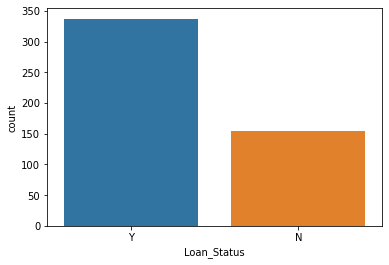

In [35]:
import seaborn as sb
sb.countplot(ytrain.Loan_Status)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=22)
rf = RandomForestClassifier(random_state=22)
ab = AdaBoostClassifier(DecisionTreeClassifier(random_state=22))

In [37]:
def makemodel(mo):
    model = mo.fit(xtrain,ytrain)
    pred_ts = model.predict(xtest)
    pred_tr = model.predict(xtrain)
    from sklearn.metrics import accuracy_score
    ts_acc = round(accuracy_score(ytest,pred_ts),3)
    tr_acc = round(accuracy_score(ytrain,pred_tr),3)
    print("training accuracy: ",tr_acc,"\ntesting_accuracy: ",ts_acc)
    if(tr_acc>ts_acc):
        print("Model overfits")
    else:
        print("No overfitting")

In [38]:
makemodel(lr)

training accuracy:  0.821 
testing_accuracy:  0.789
Model overfits


In [39]:
makemodel(dt)

training accuracy:  1.0 
testing_accuracy:  0.699
Model overfits


In [40]:
makemodel(rf)

training accuracy:  1.0 
testing_accuracy:  0.74
Model overfits


In [41]:
makemodel(ab)

training accuracy:  1.0 
testing_accuracy:  0.724
Model overfits


In [42]:
for i in range(2,18,1):
    dt = DecisionTreeClassifier(random_state=22,max_depth=i)
    print("---------------------------")
    print("Results for max depth: %d"%i)
    makemodel(dt)

---------------------------
Results for max depth: 2
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for max depth: 3
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for max depth: 4
training accuracy:  0.831 
testing_accuracy:  0.78
Model overfits
---------------------------
Results for max depth: 5
training accuracy:  0.847 
testing_accuracy:  0.772
Model overfits
---------------------------
Results for max depth: 6
training accuracy:  0.862 
testing_accuracy:  0.764
Model overfits
---------------------------
Results for max depth: 7
training accuracy:  0.876 
testing_accuracy:  0.78
Model overfits
---------------------------
Results for max depth: 8
training accuracy:  0.904 
testing_accuracy:  0.756
Model overfits
---------------------------
Results for max depth: 9
training accuracy:  0.912 
testing_accuracy:  0.748
Model overfits
---------------------------
Results for ma

In [43]:
for i in range(2,18,1):
    dt = DecisionTreeClassifier(random_state=i,max_depth=3)
    print("---------------------------")
    print("Results for RS: %d"%i)
    makemodel(dt)

---------------------------
Results for RS: 2
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 3
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 4
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 5
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 6
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 7
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 8
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 9
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for RS: 10
training accuracy:  0.823 
testing_accuracy:  0.7

In [44]:
for i in range(2,18,1):
    dt = DecisionTreeClassifier(random_state=22,min_samples_leaf=i)
    print("---------------------------")
    print("Results for MSL: %d"%i)
    makemodel(dt)

---------------------------
Results for MSL: 2
training accuracy:  0.945 
testing_accuracy:  0.699
Model overfits
---------------------------
Results for MSL: 3
training accuracy:  0.91 
testing_accuracy:  0.659
Model overfits
---------------------------
Results for MSL: 4
training accuracy:  0.896 
testing_accuracy:  0.642
Model overfits
---------------------------
Results for MSL: 5
training accuracy:  0.886 
testing_accuracy:  0.715
Model overfits
---------------------------
Results for MSL: 6
training accuracy:  0.855 
testing_accuracy:  0.675
Model overfits
---------------------------
Results for MSL: 7
training accuracy:  0.845 
testing_accuracy:  0.748
Model overfits
---------------------------
Results for MSL: 8
training accuracy:  0.845 
testing_accuracy:  0.756
Model overfits
---------------------------
Results for MSL: 9
training accuracy:  0.841 
testing_accuracy:  0.764
Model overfits
---------------------------
Results for MSL: 10
training accuracy:  0.829 
testing_accura

In [45]:
for i in range(2,18,1):
    dt = DecisionTreeClassifier(random_state=22,min_samples_split=i)
    print("---------------------------")
    print("Results for MSL: %d"%i)
    makemodel(dt)

---------------------------
Results for MSL: 2
training accuracy:  1.0 
testing_accuracy:  0.699
Model overfits
---------------------------
Results for MSL: 3
training accuracy:  0.99 
testing_accuracy:  0.707
Model overfits
---------------------------
Results for MSL: 4
training accuracy:  0.974 
testing_accuracy:  0.715
Model overfits
---------------------------
Results for MSL: 5
training accuracy:  0.965 
testing_accuracy:  0.699
Model overfits
---------------------------
Results for MSL: 6
training accuracy:  0.951 
testing_accuracy:  0.691
Model overfits
---------------------------
Results for MSL: 7
training accuracy:  0.943 
testing_accuracy:  0.699
Model overfits
---------------------------
Results for MSL: 8
training accuracy:  0.927 
testing_accuracy:  0.691
Model overfits
---------------------------
Results for MSL: 9
training accuracy:  0.925 
testing_accuracy:  0.715
Model overfits
---------------------------
Results for MSL: 10
training accuracy:  0.921 
testing_accuracy

In [46]:
rf = RandomForestClassifier(random_state=22)
makemodel(rf)

training accuracy:  1.0 
testing_accuracy:  0.74
Model overfits


In [47]:
rf = RandomForestClassifier(random_state=22,max_depth=3)
makemodel(rf)

training accuracy:  0.819 
testing_accuracy:  0.789
Model overfits


In [48]:
rf = RandomForestClassifier(random_state=22,max_depth=2)
makemodel(rf)

training accuracy:  0.811 
testing_accuracy:  0.78
Model overfits


In [49]:
rf = RandomForestClassifier(n_estimators=2,random_state=22,max_depth=2)
makemodel(rf)

training accuracy:  0.815 
testing_accuracy:  0.789
Model overfits


In [50]:
rf = RandomForestClassifier(n_estimators=3,random_state=22,max_depth=2)
makemodel(rf)

training accuracy:  0.778 
testing_accuracy:  0.732
Model overfits


In [51]:
rf = RandomForestClassifier(n_estimators=4,random_state=22,max_depth=2)
makemodel(rf)

training accuracy:  0.741 
testing_accuracy:  0.699
Model overfits


In [52]:
rf = RandomForestClassifier(n_estimators=5,random_state=22,max_depth=2)
makemodel(rf)

training accuracy:  0.701 
testing_accuracy:  0.699
Model overfits


In [53]:
rf = RandomForestClassifier(n_estimators=10,random_state=22,max_depth=2)
makemodel(rf)

training accuracy:  0.76 
testing_accuracy:  0.715
Model overfits


In [54]:
ab = AdaBoostClassifier(DecisionTreeClassifier(random_state=22))
makemodel(ab)

training accuracy:  1.0 
testing_accuracy:  0.724
Model overfits


In [55]:
ab = AdaBoostClassifier(DecisionTreeClassifier(random_state=22,max_depth=3))
makemodel(ab)

training accuracy:  1.0 
testing_accuracy:  0.724
Model overfits


In [56]:
for i in range(2,18,1):
    ab = AdaBoostClassifier(DecisionTreeClassifier(random_state=22,max_depth=i))
    print("---------------------------")
    print("Results for max depth: %d"%i)
    makemodel(ab)

---------------------------
Results for max depth: 2
training accuracy:  0.961 
testing_accuracy:  0.748
Model overfits
---------------------------
Results for max depth: 3
training accuracy:  1.0 
testing_accuracy:  0.707
Model overfits
---------------------------
Results for max depth: 4
training accuracy:  1.0 
testing_accuracy:  0.74
Model overfits
---------------------------
Results for max depth: 5
training accuracy:  1.0 
testing_accuracy:  0.724
Model overfits
---------------------------
Results for max depth: 6
training accuracy:  1.0 
testing_accuracy:  0.74
Model overfits
---------------------------
Results for max depth: 7
training accuracy:  1.0 
testing_accuracy:  0.748
Model overfits
---------------------------
Results for max depth: 8
training accuracy:  1.0 
testing_accuracy:  0.748
Model overfits
---------------------------
Results for max depth: 9
training accuracy:  1.0 
testing_accuracy:  0.74
Model overfits
---------------------------
Results for max depth: 10
tra

In [57]:
for i in range(2,18,1):
    ab = AdaBoostClassifier(DecisionTreeClassifier(random_state=22,max_depth=2),n_estimators=i)
    print("---------------------------")
    print("Results for Trees: %d"%i)
    makemodel(ab)

---------------------------
Results for Trees: 2
training accuracy:  0.827 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for Trees: 3
training accuracy:  0.829 
testing_accuracy:  0.789
Model overfits
---------------------------
Results for Trees: 4
training accuracy:  0.835 
testing_accuracy:  0.772
Model overfits
---------------------------
Results for Trees: 5
training accuracy:  0.839 
testing_accuracy:  0.78
Model overfits
---------------------------
Results for Trees: 6
training accuracy:  0.833 
testing_accuracy:  0.772
Model overfits
---------------------------
Results for Trees: 7
training accuracy:  0.837 
testing_accuracy:  0.772
Model overfits
---------------------------
Results for Trees: 8
training accuracy:  0.847 
testing_accuracy:  0.764
Model overfits
---------------------------
Results for Trees: 9
training accuracy:  0.849 
testing_accuracy:  0.756
Model overfits
---------------------------
Results for Trees: 10
training accuracy:  0.8

# Predictions on test data

In [58]:
tsd.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [59]:
XP = tsd.drop(labels=["Loan_ID"],axis=1)

In [60]:
XP.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [61]:
XP.Credit_History = XP.Credit_History.fillna(1)
w = []
for i in XP.Credit_History:
    w.append(int(i))
    
XP.Credit_History=w

In [63]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
XP1 = mt.DataFrame(ss.fit_transform(XP[con]),columns=con)

In [64]:
XP1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.186461,-0.673335,-0.429368,0.270603
1,-0.352692,-0.029848,-0.166482,0.270603
2,0.039641,0.098849,1.180807,0.270603
3,-0.502774,0.418877,-0.593671,0.270603
4,-0.311909,-0.673335,-0.955139,0.270603


In [66]:
XP2 = mt.get_dummies(XP[cat])

In [67]:
XP2.head(3)

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [68]:
XP = XP1.join(XP2)

In [69]:
XP.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1


In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    float64
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    int64  
 5   Gender_Female            614 non-null    uint8  
 6   Gender_Male              614 non-null    uint8  
 7   Married_No               614 non-null    uint8  
 8   Married_Yes              614 non-null    uint8  
 9   Dependents_0             614 non-null    uint8  
 10  Dependents_1             614 non-null    uint8  
 11  Dependents_2             614 non-null    uint8  
 12  Dependents_3+            614 non-null    uint8  
 13  Education_Graduate       614 non-null    uint8  
 14  Education_Not Graduate   6

In [71]:
XP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          367 non-null    float64
 1   CoapplicantIncome        367 non-null    float64
 2   LoanAmount               367 non-null    float64
 3   Loan_Amount_Term         367 non-null    float64
 4   Credit_History           367 non-null    int64  
 5   Gender_Female            367 non-null    uint8  
 6   Gender_Male              367 non-null    uint8  
 7   Married_No               367 non-null    uint8  
 8   Married_Yes              367 non-null    uint8  
 9   Dependents_0             367 non-null    uint8  
 10  Dependents_1             367 non-null    uint8  
 11  Dependents_2             367 non-null    uint8  
 12  Dependents_3+            367 non-null    uint8  
 13  Education_Graduate       367 non-null    uint8  
 14  Education_Not Graduate   3

In [72]:
dt = DecisionTreeClassifier(max_depth=3,random_state=22)
model = dt.fit(X,Y)
predicted_Loan_Status = model.predict(XP)

In [73]:
tsd["Loan_Status"]=predicted_Loan_Status

In [75]:
tsd.to_csv("/Users/SHREE/Desktop/pred_loan.csv")

# 3. If customer is not eligible for the input required amount and duration:

# Find out ones that are rejected

In [76]:
A = tsd[tsd.Loan_Status == "N"]

In [77]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,N
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.000000,Rural,N
12,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,0.825444,Urban,N
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.000000,Semiurban,N
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.000000,Rural,N


In [78]:
A.index = range(0,91,1)

In [79]:
A = A.drop(labels=["Loan_ID","LoanAmount"],axis=1)
A.to_csv("/Users/SHREE/Desktop/LoanAMTpred.csv")